In [16]:
# Importing required libraries
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plot
from matplotlib import pyplot
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
import pandas as pd
time_series_df=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data\range for 5 Pressure.xlsx')
time_series_df.columns = ['load_date','actuals']
time_series_df.head()

,load_date,actuals
0,0.521030,5.004
1,0.521042,5.009
2,0.521053,5.011
3,0.521065,5.012
4,0.521076,5.015


In [51]:
actual_vals = time_series_df.actuals.values
actual_log = np.log10(actual_vals)

In [52]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

train, test = actual_vals[0:-70], actual_vals[-70:]

train_log, test_log = np.log10(train), np.log10(test)

my_order = (0, 1, 2)
my_seasonal_order = (1, 1, 2, 12)

In [53]:
# Split data into train / test sets
train = time_series_df.iloc[:len(time_series_df)-3000]
test = time_series_df.iloc[len(time_series_df)-3000:] # set 3000 for testing

# Fit a SARIMAX(0, 1, 2)x(1, 1, 2, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['actuals'], 
                order = (0, 1, 2), 
                seasonal_order =(1, 1, 2, 12))

result = model.fit(maxiter=300, method='nm')
result.summary()

Optimization terminated successfully.
         Current function value: -5.174759
         Iterations: 275
         Function evaluations: 501


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            actuals   No. Observations:                 1849
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                9568.129
Date:                            Sat, 02 Jul 2022   AIC                         -19124.257
Time:                                    19:31:16   BIC                         -19091.165
Sample:                                         0   HQIC                        -19112.054
                                           - 1849                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6603      0.011    -58.121      0.000      -0.683      -0.638
ma.L2         -0.0047      0.016     -0.296      0.768      -0.036       0.026
ar.S.L12      -0.9448      0.251     -3.768      0.000      -1.436      -0.453
ma.S.L12      -0.0383      0.258     -0.148      0.882      -0.544       0.467
ma.S.L24      -0.9210      0.254     -3.627      0.000      -1.419      -0.423
sigma2      1.704e-06   2.63e-08     64.915      0.000    1.65e-06    1.76e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):             11286.51
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

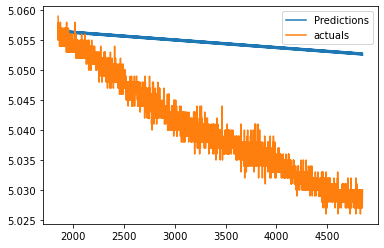

In [54]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['actuals'].plot(legend = True)

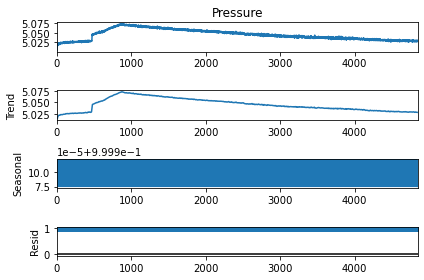

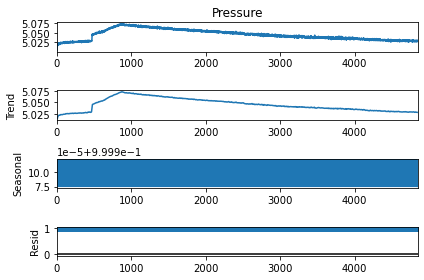

In [18]:
result = seasonal_decompose(series['Pressure'], model='multiplicable', period=12)
result.plot()

In [19]:
"""from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(series['Pressure'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()"""

'from pmdarima import auto_arima\n  \n# Ignore harmless warnings\nimport warnings\nwarnings.filterwarnings("ignore")\n  \n# Fit auto_arima function to AirPassengers dataset\nstepwise_fit = auto_arima(series[\'Pressure\'], start_p = 1, start_q = 1,\n                          max_p = 3, max_q = 3, m = 12,\n                          start_P = 0, seasonal = True,\n                          d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \n# To print the summary\nstepwise_fit.summary()'

In [20]:
#X = series.values
#train, test = X[1:len(X)-3000], X[len(X)-3000:]

In [21]:
# Split data into train / test sets
train = series.iloc[:len(series)-3000]
test = series.iloc[len(series)-3000:] # set 3000 for testing

# Fit a SARIMAX(0, 1, 2)x(1, 1, 2, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Pressure'], 
                order = (0, 1, 2), 
                seasonal_order =(1, 1, 2, 12))

result = model.fit()
result.summary()

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Pressure   No. Observations:                 1849
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                9523.199
Date:                            Sat, 02 Jul 2022   AIC                         -19034.398
Time:                                    18:03:23   BIC                         -19001.306
Sample:                                         0   HQIC                        -19022.194
                                           - 1849                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7373      0.011    -68.521      0.000      -0.758      -0.716
ma.L2          0.0079      0.013      0.598      0.550      -0.018       0.034
ar.S.L12      -0.5141      0.259     -1.982      0.047      -1.023      -0.006
ma.S.L12      -0.3985      0.268     -1.484      0.138      -0.925       0.128
ma.S.L24      -0.3809      0.234     -1.625      0.104      -0.840       0.079
sigma2        1.8e-06   2.78e-08     64.636      0.000    1.75e-06    1.85e-06
===================================================================================
Ljung-Box (L1) (Q):                   7.21   Jarque-Bera (JB):             13182.14
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

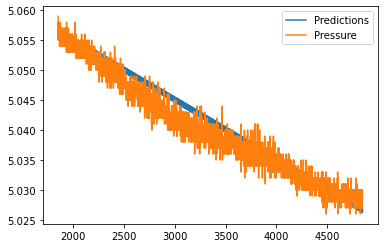

In [22]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Pressure'].plot(legend = True)

In [23]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [24]:
# Calculate root mean squared error
rmse(test["Pressure"], predictions)

0.002265941365780023

In [25]:
# Calculate mean squared error
mean_squared_error(test["Pressure"], predictions)

5.1344902731530355e-06

### Forecast using ARIMA Model

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:>

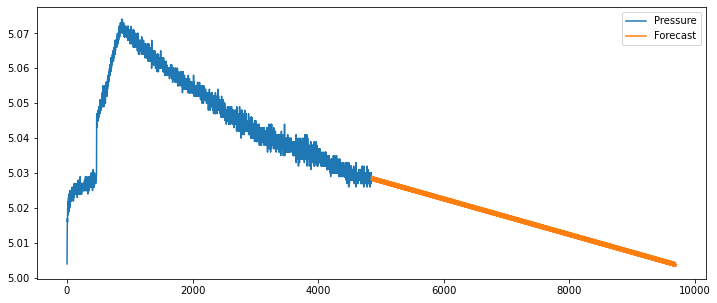

In [26]:
# Train the model on the full dataset
model = model = SARIMAX(series['Pressure'], 
                        order = (0, 1, 2), 
                        seasonal_order =(1, 1, 2, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(series), 
                          end = (len(series)-1) + 4849, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
series['Pressure'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [27]:
print(forecast)

4849    5.028205
4850    5.028201
4851    5.027939
4852    5.028275
4853    5.029064
          ...   
9693    5.003299
9694    5.003650
9695    5.003479
9696    5.004062
9697    5.003562
Name: Forecast, Length: 4849, dtype: float64


In [32]:
predicted=pd.DataFrame()

predicted['Time']=series['Time']
predicted['actuals']=series['Pressure']
predicted['predicted']=forecast.values

predicted.reset_index(inplace=False)
predicted.head()

,Time,actuals,predicted
0,12:30:17,5.004,5.028205
1,12:30:18,5.009,5.028201
2,12:30:19,5.011,5.027939
3,12:30:20,5.012,5.028275
4,12:30:21,5.015,5.029064


### Steps to detect anomalies:
1. Compute the error term(actual- predicted).
2. Compute the rolling mean and rolling standard deviation(window is a week).
3. Classify data with an error of 1.5,1.75 and 2 standard deviations as limits for low,medium and high anomalies. (5% of data point would be identified anomalies based on this property)

In [47]:
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE", 7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='load_date', ascending=False)
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y-%m-%d")
    return df

In [48]:
df

,Time,Pressure
0,12:30:17,5.004
1,12:30:18,5.009
2,12:30:19,5.011
3,12:30:20,5.012
4,12:30:21,5.015
...,...,...
4844,13:59:56,5.027
4845,13:59:57,5.027
4846,13:59:58,5.028
4847,13:59:59,5.029


In [49]:
dates = series.Time
def plot_anomaly(df,metric_name):
    dates = series.Time
    bool_array = (abs(df['anomaly_points']) > 0)
    
#And a subplot of the Actual Values.
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
#Order_results['meanval']=meanval
    #Order_results['deviation']=deviation
    color_map= {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "orange", 3: "red"}
    table = go.Table(domain=dict(x=[0, 1], y=[0, 0.3]), columnwidth=[1, 2 ],
                     header = dict(height = 20, values = [['<b>Date</b>'],['<b>Actual Values </b>'],['<b>Predicted</b>'],
                                                          ['<b>% Difference</b>'],['<b>Severity (0-3)</b>']],
                                   font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                                   fill = dict(color='#d562be')),
                     cells = dict(values = [df.round(3)[k].tolist() for k in ['load_date', 'actuals',
                                                                            'predicted','percentage_change','color']],
                                  line = dict(color='#506784'),
                                  align = ['center'] * 5,
                                  font = dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                                  suffix=[None] + [''] + [''] + ['%'] + [''],
                                  height = 27,
                                  fill=dict(color=[df['color'].map(color_map)],
                                           )
                                 )
                    )
    
    
#df['ano'] = np.where(df['color']==3, df['error'], np.nan)
anomalies = go.Scatter(name="Anomaly",
                       x=dates,
                       xaxis='x1',
                       yaxis='y1',
                       y=df['anomaly_points'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))
upper_bound = go.Scatter(hoverinfo="skip",
                         x=dates,
                         showlegend =False,
                         xaxis='x1',
                         yaxis='y1',
                         y=df['3s'],
                         marker=dict(color="#444"),
                         line=dict(
                             color=('rgb(23, 96, 167)'),
                             width=2,
                             dash='dash'),
                         fillcolor='rgba(68, 68, 68, 0.3)',
                         fill='tonexty')

lower_bound = go.Scatter(name='Confidence Interval',
                          x=dates,
                         xaxis='x1',
                         yaxis='y1',
                          y=df['-3s'],
                          marker=dict(color="#444"),
                          line=dict(
                              color=('rgb(23, 96, 167)'),
                              width=2,
                              dash='dash'),
                          fillcolor='rgba(68, 68, 68, 0.3)',
                          fill='tonexty')

Actuals = go.Scatter(name= 'Actuals',
                     x= dates,
                     y= df['actuals'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))

Predicted = go.Scatter(name= 'Predicted',
                     x= dates,
                     y= df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))

# create plot for error...
Error = go.Scatter(name="Error",
                   x=dates, y=df['error'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='line',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")
    
anomalies_map = go.Scatter(name = "anomaly actual",
                                   showlegend=False,
                                   x=dates,
                                   y=anomaly_points,
                                   mode='markers',
                                   xaxis='x2',
                                   yaxis='y2',
                                    marker = dict(color ="red",
                                  size = 11,
                                 line = dict(
                                     color = "red",
                                     width = 2)))

Mvingavrg = go.Scatter(name="Moving Average",
                           x=dates,
                           y=df['meanval'],
                           mode='line',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color="green"),
                           text="Moving average")

axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True,
    ticklen=4,
    gridcolor='#ffffff',
    tickfont=dict(size=10))

layout = dict(
    width=1000,
    height=865,
    autosize=False,
    title= metric_name,
    margin = dict(t=75),
    showlegend=True,
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2', showticklabels=True)),
    yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20 + 0.09, 1], anchor='x1', hoverformat='.2f')),
    yaxis2=dict(axis, **dict(domain=[0.21 + 0.12, 2 * 0.31 + 0.02], anchor='x2', hoverformat='.2f')))

fig = go.Figure(data = [table,anomalies,anomalies_map,
                        upper_bound,lower_bound,Actuals,Predicted,
                        Mvingavrg,Error], layout = layout)
iplot(fig)
pyplot.show()
classify_df=detect_classify_anomalies(predicted_df,7)
classify_df.reset_index(inplace=True)
del classify_df['index']
plot_anomaly(classify_df,"metric_name")

KeyError: 'anomaly_points'